<a href="https://colab.research.google.com/github/SilahicAmil/30-Days-Of-ML/blob/main/Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seaborn**

# Distribution Plots

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Import Data

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


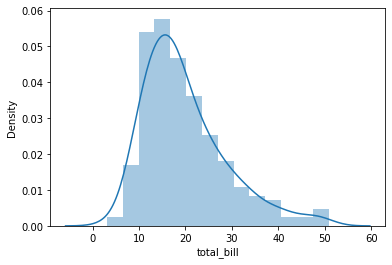

In [6]:
sns.distplot(tips["total_bill"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


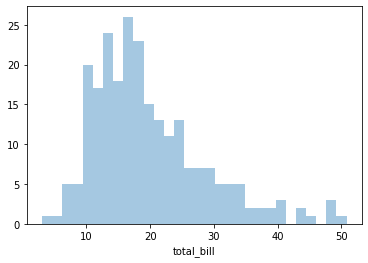

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=30);

## Jointplot

Allwos you to match up two distplots for bivariate data. Many choices of parameters to compare

* Scatter
* Reg
* Resid
* KDE
* Hex

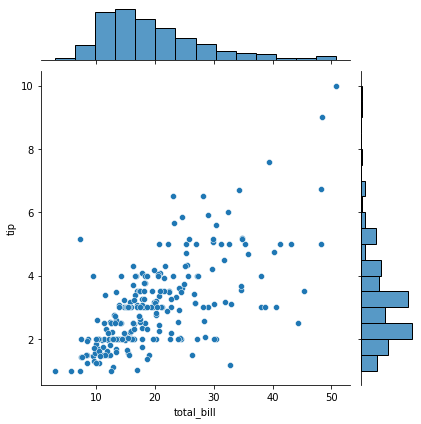

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter');

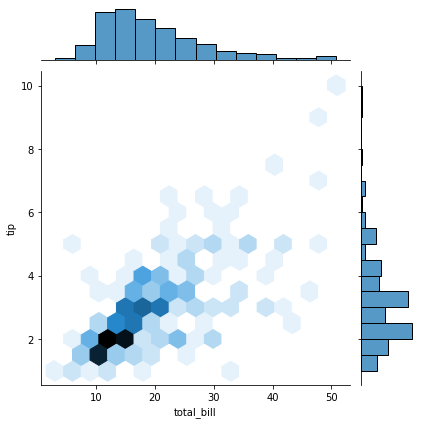

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex');

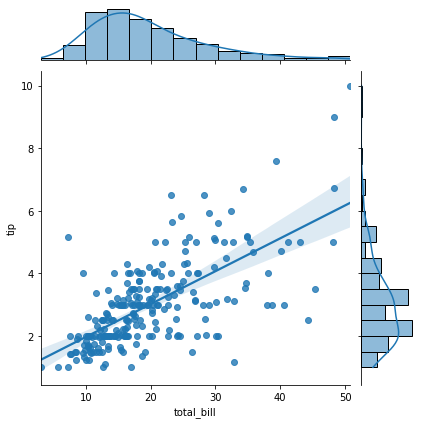

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg');

## Pairplot

Plot pairwise relationships across and entire dataframe for numerical columns. For categorical columns there is a color hue argument

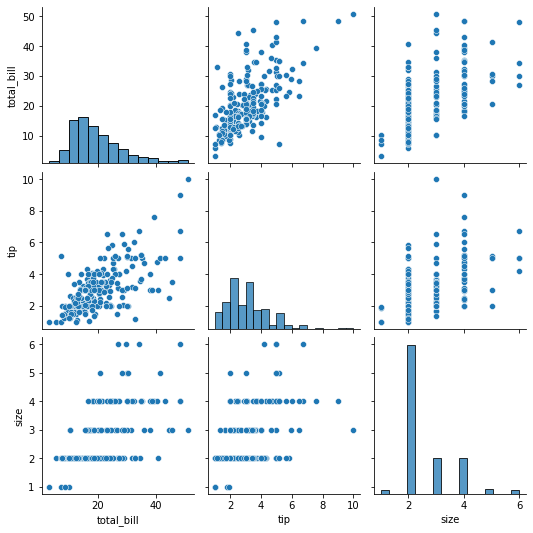

In [12]:
sns.pairplot(tips);

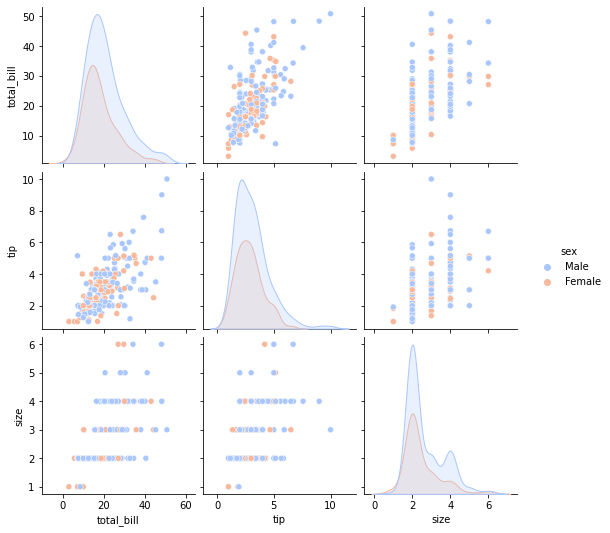

In [13]:
sns.pairplot(tips,hue='sex',palette='coolwarm');

## Rugplot

Rugplots draw a dash mark for every point on a univariate distribution. Building block of KDE plots

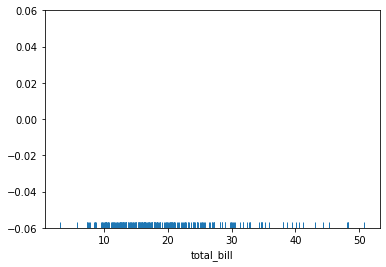

In [15]:
sns.rugplot(tips['total_bill']);

## KDEplot

Kernal Density Estimation plots. These type of KDE plots replace every observation with a Gaussian distribution centered around the value.

(0.0, 1.0)

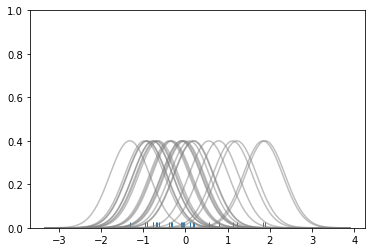

In [18]:
#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of Basis Functions')

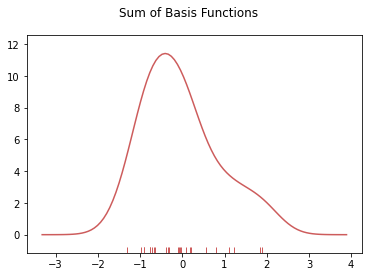

In [20]:
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Set title
plt.suptitle("Sum of Basis Functions")

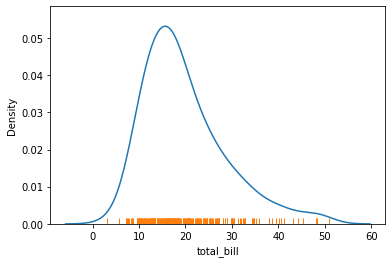

In [22]:
sns.kdeplot(tips['total_bill']);
sns.rugplot(tips['total_bill']);

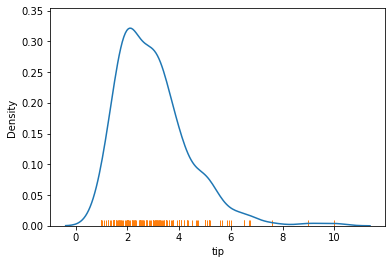

In [24]:
sns.kdeplot(tips['tip']);
sns.rugplot(tips['tip']);

# Categorical Data Plots

Few main plot types for categorical data:

* Factorplot
* Boxplot
* ViolinPlot
* Stripplot
* Swarmplot
* Barplot
* Countplot

## Barplot and Countplot

Aggregate data off a categorical features in your data. By default aggregating categorical data is based off some function default the mean

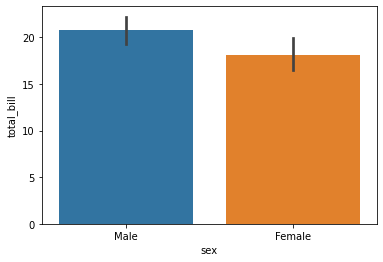

In [27]:
sns.barplot(x='sex',y='total_bill',data=tips);

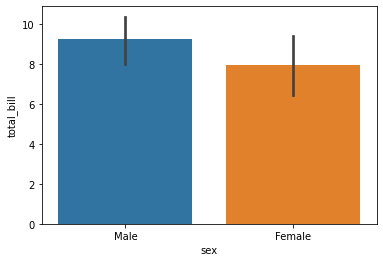

In [28]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std);

## Countplot

Essentially the same as a barplot except the estimator is explicity counting the number of occurences.

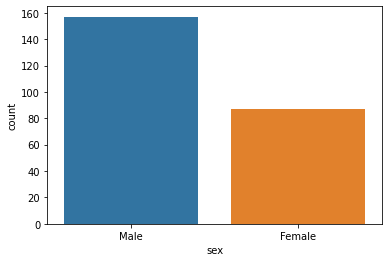

In [30]:
sns.countplot(x='sex',data=tips);

## Boxplot and Violinplot

Boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be outliers

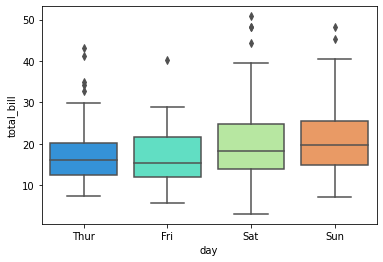

In [32]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow');

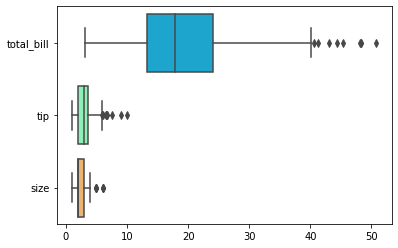

In [34]:
# Entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h');

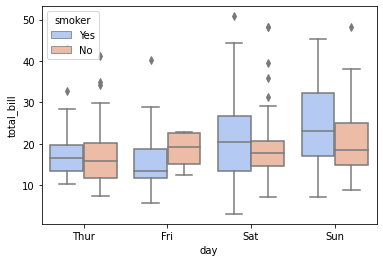

In [35]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm");

## Violinplot

A violin plot plays a similar role as a box and whisker plot.

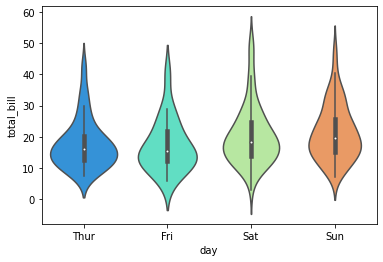

In [36]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow');

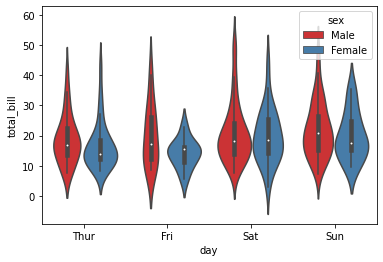

In [37]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1');

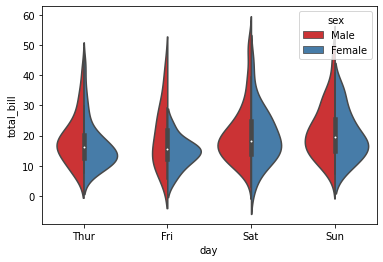

In [38]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1');

## Stripplot and Swarmplot

* The stripplot will draw a scatterplot where one variable is categorical.
* The swarmplot is similar to stripplot(), but the points are adjusted so that they don’t overlap.

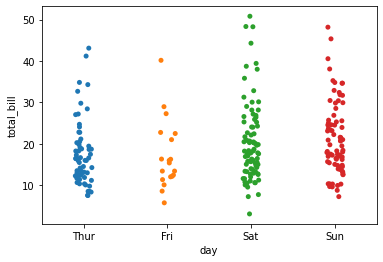

In [41]:
sns.stripplot(x="day", y="total_bill", data=tips);

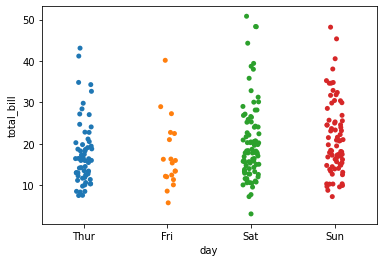

In [42]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True);

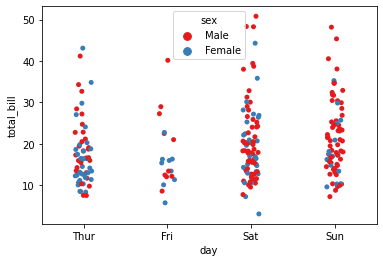

In [43]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1');

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


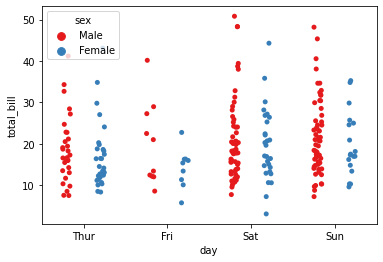

In [45]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True);

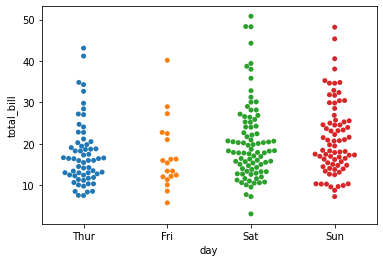

In [46]:
sns.swarmplot(x="day", y="total_bill", data=tips);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


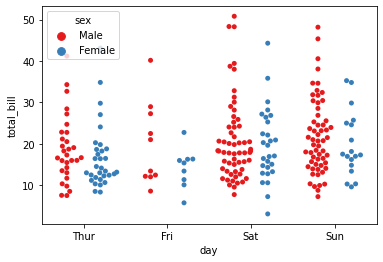

In [47]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True);

## Combining Categorical Plots

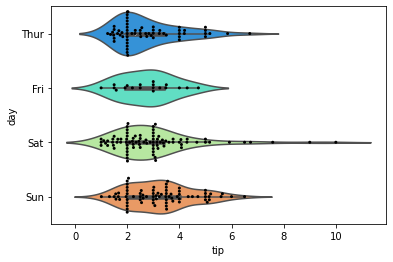

In [49]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow');
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3);

## Factorplot

Factorplot is the most general form of a categorical plot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


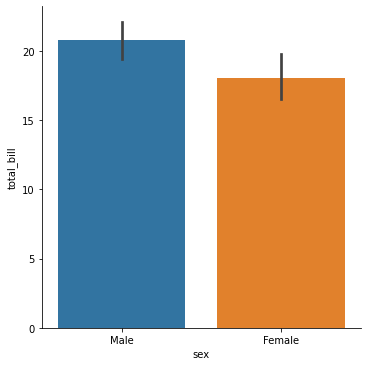

In [50]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar');

# Regression Plots

Seaborn has many built-in capabilities for regression plots. `lmplot` allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

## lmplot

1.   List item
2.   List item



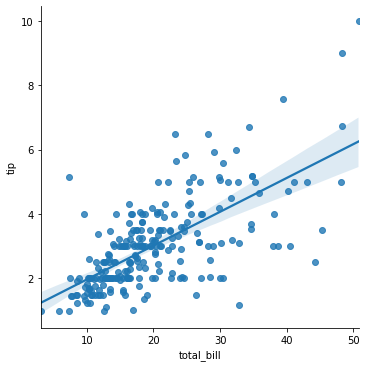

In [53]:
sns.lmplot(x="total_bill", y="tip", data=tips);

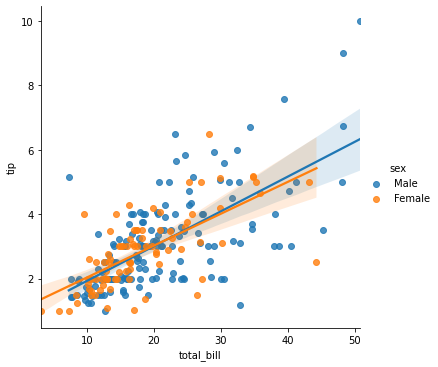

In [55]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex');

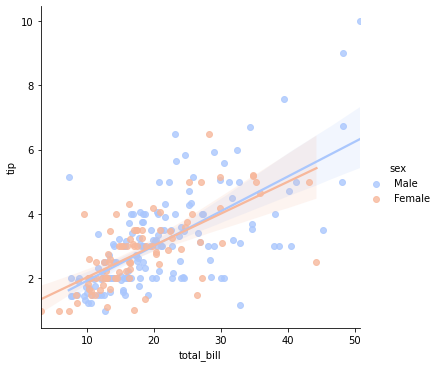

In [56]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm');

## Markers / Styling

http://matplotlib.org/api/markers_api.html

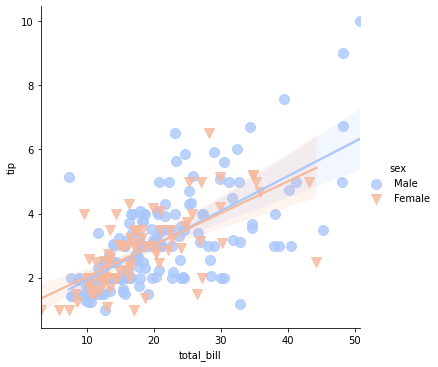

In [59]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100});

## Using a Grid

Just like matplotlib there is a subplots type feature. You can use a grid by using the column and row arguments

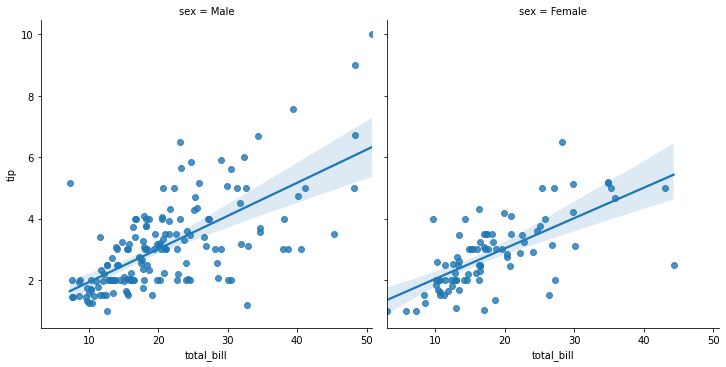

In [60]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex');

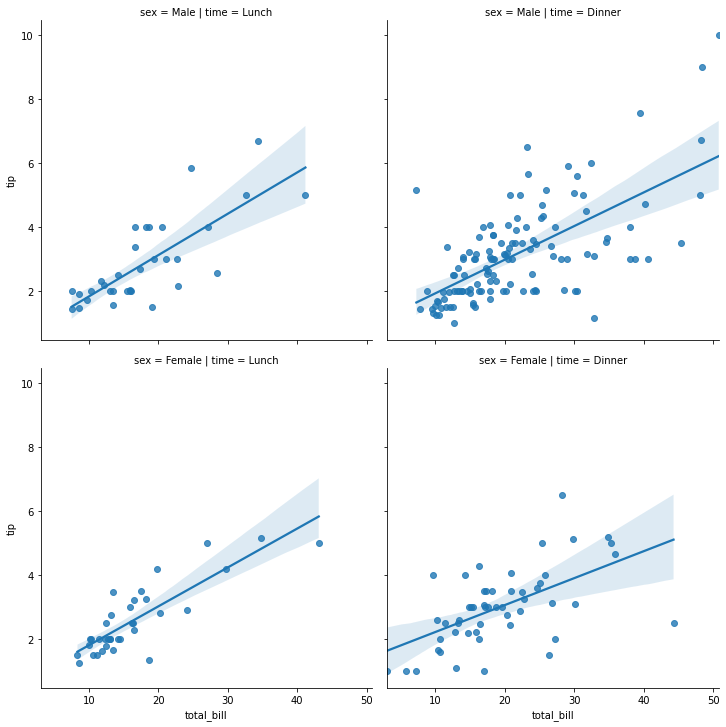

In [61]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips);

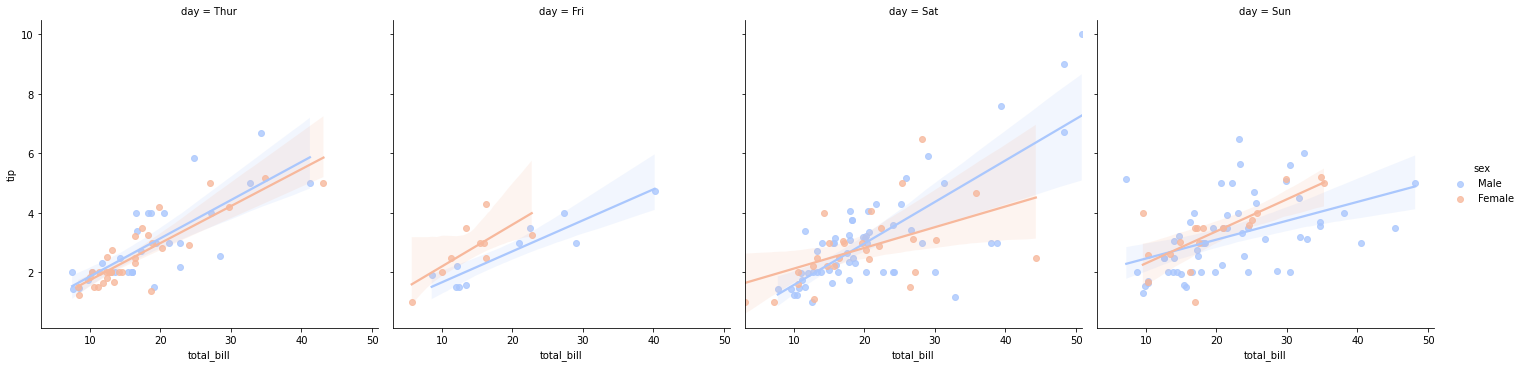

In [62]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm');

## Aspect and Size

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


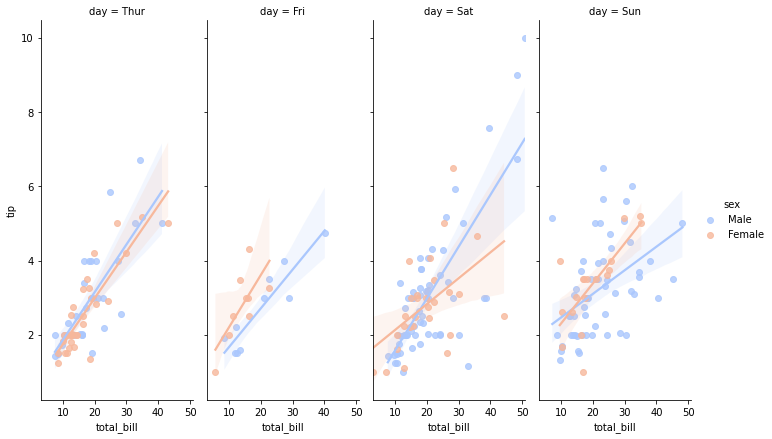

In [65]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.4,size=6);